In [35]:
import os
from dotenv import load_dotenv
from numpy import vectorize 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import string

s=""
sample_files = []
load_dotenv()

Space_Cleared_Exts = os.environ["EXTENSIONS"].replace(" ", "")
# ------------------------------------------------------------------
# Parcourt tout les fichiers finissant avec les extensions dans .env
# ------------------------------------------------------------------
for ext in os.environ["EXTENSIONS"] :
    if(ext==",") :
        ext="["
        for doc in os.listdir("./FilesToTest/") :
            if doc.endswith(str(s)) :
                sample_files.append(''.join(doc))
        s = ""
    if(ext!="[" and ext!="]") :
        s+=ext
for doc in os.listdir("./FilesToTest/") :
    if doc.endswith(str(s.replace(" ",""))) :
        sample_files.append(''.join(doc))
 
sample_contents = [open("./FilesToTest/"+File).read() for File in sample_files]
print(sample_contents)

['var x = math.floor(math.random() * 5);\nbeed = 2\n\nvar kek = "kek";\n\nif(x==1) {\n    b = 3\n} else {\n    b = 1\n}\n\n\n// DDDDDDDDDDDDdd\n/* HEHEBOY \n\n\n\nSDqsd\n*/', 'Content3\nbeed = 5\n// Normal Commentary', 'yes\n// Normal Commentary', 'HEHE']


In [36]:
Commentary_Content = []
Var_Content = []
Equal_Content = []
Loop_Content = []

Sample_Content_Double = []
Sample_Content_Without_VarComms = []
Sample_Content_Without_VarCommsLoop =  []
Sample_Content_Without_VarCommsLoopEq = []

# ---------------------------------------------------------------------------------
# Parcourt notre texte et enleve les commentaires si le texte vient d'un fichier JS
# ---------------------------------------------------------------------------------

def PurgeJSCommentary(word) :
    Sample_ContentsBis = sample_contents[word].splitlines(True)
    Sample_Content_SubFile = []
    Commentary_SubFile = []
    Long_Comment = False
    for lines in Sample_ContentsBis :
        if(Long_Comment) :
            Commentary_SubFile.append(lines)
        if("//" in lines) :
            Commentary_SubFile.append(lines)
        if("/*" in lines):
            Long_Comment = True
            Commentary_SubFile.append(lines)
        if("*/" in lines):
            Long_Comment = False
            Commentary_SubFile.append(lines) 
        if("//" not in lines and "/*" not in lines and "*/" not in lines and Long_Comment == False):
            Sample_Content_SubFile.append(lines)
    Sample_Content_Double.append(Sample_Content_SubFile)
    Commentary_Content.append(Commentary_SubFile)

In [37]:
def PurgeJSVariables(index) :
    Sample_Content_SubFile = []
    Var_SubFile = []
    for lines in Sample_Content_Double[index] :
        if("var" in lines) :
            Var_SubFile.append(lines)
        else :
            Sample_Content_SubFile.append(lines)
    Sample_Content_Without_VarComms.append(Sample_Content_SubFile)
    Var_Content.append(Var_SubFile)

In [38]:
def PurgeJSLoops(index) :
    Sample_Content_SubFile = []
    Loop_SubFile = []
    IsLoop = False
    for lines in Sample_Content_Without_VarComms[index] :
        if("}" in lines) :
            Loop_SubFile.append(lines)
            IsLoop = False
        if(IsLoop) :
            Loop_SubFile.append(lines)
        if("{" in lines) :
            Loop_SubFile.append(lines)
            IsLoop = True
        if("}" not in lines and "{" not in lines and IsLoop is False) :
            Sample_Content_SubFile.append(lines)
    Sample_Content_Without_VarCommsLoop.append(Sample_Content_SubFile)
    Loop_Content.append(Loop_SubFile)

In [39]:
def PurgeJSEquals(index) :
    Sample_Content_SubFile =[]
    Equal_SubFile = []
    for lines in Sample_Content_Without_VarCommsLoop[index] :
        if("=" in lines) :
            Equal_SubFile.append(lines)
        else :
            Sample_Content_SubFile.append(lines)
    Sample_Content_Without_VarCommsLoopEq.append(Sample_Content_SubFile)
    Equal_Content.append(Equal_SubFile)

In [40]:
    for i in range(len(sample_files)) :
        if(sample_files[i].endswith(".js")) :
            PurgeJSCommentary(i)
            PurgeJSVariables(i)
            PurgeJSLoops(i)
            PurgeJSEquals(i)

In [41]:
All_Content = []


print("Commentary Content : \n")
print(Commentary_Content)
print("\nVar Content : \n")
print(Var_Content)
print("\nEqual Content : \n")
print(Equal_Content)
print("\nLoop Content : \n")
print(Loop_Content)

All_Content.append(Commentary_Content)
All_Content.append(Var_Content)
All_Content.append(Equal_Content)
All_Content.append(Loop_Content)



Commentary Content : 

[['// DDDDDDDDDDDDdd\n', '/* HEHEBOY \n', '\n', '\n', '\n', 'SDqsd\n', '*/', '*/'], ['// Normal Commentary'], ['// Normal Commentary']]

Var Content : 

[['var x = math.floor(math.random() * 5);\n', 'var kek = "kek";\n'], [], []]

Equal Content : 

[['beed = 2\n'], ['beed = 5\n'], []]

Loop Content : 

[['if(x==1) {\n', '    b = 3\n', '} else {\n', '} else {\n', '    b = 1\n', '}\n'], [], []]


In [42]:
def tokenize() :
    return ""
tokenize()

''

In [43]:
# vectorize = lambda Text: TfidfVectorizer().fit_transform(Text).toarray()

def vectorize(Text) :
    return TfidfVectorizer().fit_transform(Text).toarray()

# similarity = lambda doc1, doc2: cosine_similarity([doc1, doc2])

def similarity(doc1,doc2) :
    return cosine_similarity([doc1,doc2])

In [44]:

def check_plagiarism(TestFiles):
    vectors = vectorize(TestFiles)
    s_vectors = list(zip(sample_files, vectors))
    results = set()
    for sample_a, text_vector_a in s_vectors:
        new_vectors = s_vectors.copy()
        current_index = new_vectors.index((sample_a, text_vector_a))
        del new_vectors[current_index]
        for sample_b, text_vector_b in new_vectors:
            sim_score = similarity(text_vector_a, text_vector_b)[0][1]
            sample_pair = sorted((sample_a, sample_b))
            score = sample_pair[0], sample_pair[1], sim_score
            results.add(score)
    return results

('no.js', 'yes.js', 0.09879945973664696)
('testingfile.js', 'yes.js', 1.0000000000000002)
('no.js', 'testingfile.js', 0.09879945973664696)


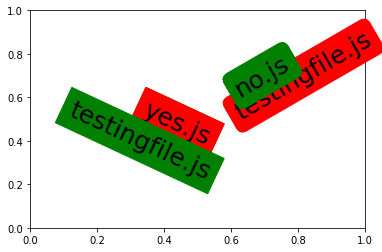

('no.js', 'testingfile.js', 0.0)
('no.js', 'yes.js', 0.0)
('testingfile.js', 'yes.js', 0.0)


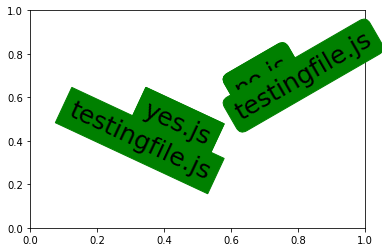

('no.js', 'yes.js', 0.0)
('no.js', 'testingfile.js', 0.8740680002769542)
('testingfile.js', 'yes.js', 0.0)


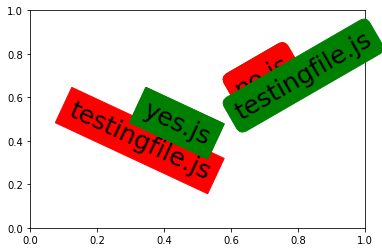

('no.js', 'testingfile.js', 0.0)
('no.js', 'yes.js', 0.0)
('testingfile.js', 'yes.js', 0.0)


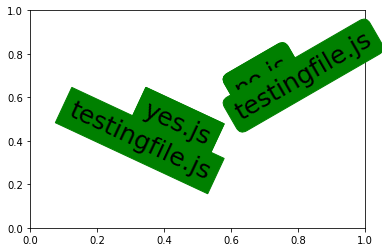

In [45]:

import matplotlib.pyplot as plt

def ExecutePlagiarismChecker(ArrayToTest):
    for array_index in range(len(ArrayToTest)):
        temp_text = ""
        for item_index in range(len(ArrayToTest[array_index])):
            temp_text += ArrayToTest[array_index][item_index]
        ArrayToTest[array_index] = temp_text
    return check_plagiarism(ArrayToTest)
Scoring = 0

for Content in All_Content :   
    for score in ExecutePlagiarismChecker(Content) :
        result = (','.join(map(str,(score)))).split(',')
        color = 'none'
        Scoring += float(result[2])
        print(score)
        if(float(result[2])>0.6) :
            color='red'
        else :
            color='green'
            
        plt.text(0.6, 0.7, result[0], size=25, rotation=30.,
                ha="left", va="center",
                bbox=dict(boxstyle="round",
                        ec=(color),
                        fc=(color),
                        )
                )

        plt.text(0.55, 0.6, result[1], size=25, rotation=-25.,
                ha="right", va="top",
                bbox=dict(boxstyle="square",
                        ec=(color),
                        fc=(color),
                        )
                )
    # print(Scoring/4)
    plt.show()